# Import libraries and define a few variables

In [1]:
import matplotlib.pyplot as plt
import ecg_plot
import numpy as np
import os 
import neurokit2 as nk
import random
import warnings

from scipy.io import loadmat
from glob import glob

warnings.filterwarnings('ignore')

In [2]:
path_mat = glob('Training_2/*.mat')
len(path_mat)

3453

# Function to load desired data

In [3]:
def load_data(filename,calib):
    
    x = loadmat(filename)
    data = np.asarray(x['val'], dtype=np.float64)
    
    lead_1 = data[0]/calib    
    lead_2 = data[1]/calib
    lead_3 = data[2]/calib

    avr = data[3]/calib
    avl = data[4]/calib
    avf = data[5]/calib

    v1 = data[6]/calib
    v2 = data[7]/calib
    v3 = data[8]/calib
    v4 = data[9]/calib
    v5 = data[10]/calib
    v6 = data[11]/calib
    
    new_file = filename.replace('.mat','.hea')
    input_header_file = os.path.join(new_file)
    with open(input_header_file,'r') as f:
        header_data=f.readlines()
        
    gender = header_data[-5][6:].split('\n')[0]
    
    dict_1 = {'lead_1': lead_1,
              'lead_2': lead_2,
              'lead_3': lead_3,
              'avr': avr,
              'avl': avl,
              'avf': avf,
              'v1': v1,
              'v2': v2,
              'v3': v3,
              'v4': v4,
              'v5': v5,
              'v6': v6} 
    
    return dict(dict_1) ,gender,header_data

# Fixed variables

In [4]:
baseline = 16
sr = 500
calib = 1000

# P wave morphology analysis

In [5]:
n = random.randint(0,len(path_mat))

In [6]:
extracted_data = load_data(path_mat[n],calib)

In [7]:
extracted_data

({'lead_1': array([ 0.004,  0.011, -0.007, ..., -0.095, -0.088, -0.074]),
  'lead_2': array([-0.062, -0.082, -0.08 , ..., -0.119, -0.112, -0.103]),
  'lead_3': array([-0.066, -0.093, -0.073, ..., -0.025, -0.024, -0.029]),
  'avr': array([0.028, 0.035, 0.043, ..., 0.107, 0.1  , 0.088]),
  'avl': array([ 0.035,  0.052,  0.032, ..., -0.036, -0.032, -0.022]),
  'avf': array([-0.063, -0.087, -0.076, ..., -0.072, -0.068, -0.066]),
  'v1': array([-0.03 , -0.038, -0.025, ..., -0.014, -0.014, -0.008]),
  'v2': array([-0.16 , -0.223, -0.191, ..., -0.173, -0.165, -0.18 ]),
  'v3': array([-0.228, -0.323, -0.284, ..., -0.246, -0.235, -0.257]),
  'v4': array([-0.165, -0.229, -0.199, ..., -0.196, -0.187, -0.207]),
  'v5': array([-0.126, -0.177, -0.155, ..., -0.163, -0.15 , -0.161]),
  'v6': array([-0.085, -0.121, -0.105, ..., -0.119, -0.117, -0.135])},
 'Male',
 ['Q1594 12 500 5000 15-May-2020 15:35:30\n',
  'Q1594.mat 16+24 1000/mV 16 0 4 19 0 I\n',
  'Q1594.mat 16+24 1000/mV 16 0 -62 28 0 II\n',
  

In [8]:
lead_data = extracted_data[0]
lead_data

{'lead_1': array([ 0.004,  0.011, -0.007, ..., -0.095, -0.088, -0.074]),
 'lead_2': array([-0.062, -0.082, -0.08 , ..., -0.119, -0.112, -0.103]),
 'lead_3': array([-0.066, -0.093, -0.073, ..., -0.025, -0.024, -0.029]),
 'avr': array([0.028, 0.035, 0.043, ..., 0.107, 0.1  , 0.088]),
 'avl': array([ 0.035,  0.052,  0.032, ..., -0.036, -0.032, -0.022]),
 'avf': array([-0.063, -0.087, -0.076, ..., -0.072, -0.068, -0.066]),
 'v1': array([-0.03 , -0.038, -0.025, ..., -0.014, -0.014, -0.008]),
 'v2': array([-0.16 , -0.223, -0.191, ..., -0.173, -0.165, -0.18 ]),
 'v3': array([-0.228, -0.323, -0.284, ..., -0.246, -0.235, -0.257]),
 'v4': array([-0.165, -0.229, -0.199, ..., -0.196, -0.187, -0.207]),
 'v5': array([-0.126, -0.177, -0.155, ..., -0.163, -0.15 , -0.161]),
 'v6': array([-0.085, -0.121, -0.105, ..., -0.119, -0.117, -0.135])}

In [9]:
for key in lead_data.keys():
    
    _, rpeaks = nk.ecg_peaks(lead_data[key], sampling_rate=sr)
    _, waves_peak = nk.ecg_delineate(lead_data[key], 
                                     rpeaks, 
                                     sampling_rate=sr, 
                                     method="dwt", 
                                     show=False, 
                                     show_type='all')
    cardiac_phase = nk.ecg_phase(ecg_cleaned=lead_data[key], rpeaks=rpeaks,
                                 delineate_info=waves_peak, sampling_rate=sr)
    
    if key == 'lead_1':
        print(f'Morphologies of {key}')
        print()
        

        for p_on,p_off,r in zip(waves_peak['ECG_P_Onsets'],waves_peak['ECG_P_Offsets'],waves_peak['ECG_R_Onsets']):
            negative = 0
            try:
                #Calculate 
                p_wave_dur = p_off-p_on
                p_r_int = r-p_on
                amp = np.max(lead_data[key][p_on:p_off+1])
                for p_vals in lead_data[key][p_on:p_off+1]:
                    if p_vals < 0:
                        negative += 1
                        
                if p_wave_dur < 12 and amp < 0.25 and negative == 0 and (p_r_int) > 120 and (p_r_int) < 200:
                    print('Normal wave')
                else:
                    print(f'Abnormal wave with P wave duration: {p_wave_dur}, amplitude: {amp}, PR interval: {p_r_int}, and negative waves: {negative}')
                print()
            except:
                print('Nan vals')
                print()
                
        print('--------------------------------------------------------------------------------------')
    
    if key == 'lead_2':
        print(f'Morphologies of {key}')
        print()
        
        for p_on,p_off,r in zip(waves_peak['ECG_P_Onsets'],waves_peak['ECG_P_Offsets'],waves_peak['ECG_R_Onsets']):  
            negative = 0
            try:
               #Calculate 
                p_wave_dur = p_off-p_on
                p_r_int = r-p_on
                amp = np.max(lead_data[key][p_on:p_off+1])
                for p_vals in lead_data[key][p_on:p_off+1]:
                    if p_vals < 0:
                        negative += 1
                        
                if p_wave_dur < 12 and amp < 0.25 and negative == 0:
                    print(f'Normal wave, PR int: {p_r_int}')
                    print()
                elif p_wave_dur < 12 and amp > 0.25 and negative == 0:
                    print(f'Right Atrial Enlargement because amplitude is: {amp}, PR int: {p_r_int}')
                    print()
                elif p_wave_dur > 12 and amp < 0.25 and negative == 0:
                    print(f'Left Atrial Enlargement because P wave lasts for {p_wave_dur}, PR int: {p_r_int}')
                    print()
                elif negative == len(waves_peak['ECG_P_Onsets']):
                    print('P wave inversion')
                    print()
                elif negative < len(waves_peak['ECG_P_Onsets']):
                    print('Biphasic wave, not seen in lead 2')
                    print()
            except:
                print('Nan vals')
                print()
                
        print('--------------------------------------------------------------------------------------')
        
    if key == 'v1':
        print(f'Morphologies of {key}')
        print()
        
        for p_on,p_off,r in zip(waves_peak['ECG_P_Onsets'],waves_peak['ECG_P_Offsets'],waves_peak['ECG_R_Onsets']):  
            negative = 0
            try:
               #Calculate 
                p_wave_dur = p_off-p_on
                p_r_int = r-p_on
                amp = np.max(lead_data[key][p_on:p_off+1])
                for p_vals in lead_data[key][p_on:p_off+1]:
                    if p_vals < 0:
                        negative += 1
                        
                if p_wave_dur < 12 and amp < 0.15 and negative < len(waves_peak['ECG_P_Onsets']):
                    print(f'Normal wave, PR int: {p_r_int}')
                    print()
                elif p_wave_dur < 12 and amp > 0.15 and negative < len(waves_peak['ECG_P_Onsets']):
                    print(f'Right Atrial Enlargement because amplitude is: {amp}, PR int: {p_r_int}')
                    print()
                elif p_wave_dur > 40 and amp > 0.1 and negative < len(waves_peak['ECG_P_Onsets']):
                    print(f'Left Atrial Enlargement because P wave lasts for {p_wave_dur}, PR int: {p_r_int}')
                    print()
                elif negative == len(waves_peak['ECG_P_Onsets']):
                    print('P wave inversion')
                    print()
                elif negative == 0:
                    print(f'Upright wave with P wave duration: {p_wave_dur}, amplitude: {amp}, PR interval: {p_r_int}, and negative waves: {negative}')
                    print()
                else:
                    print(f'Abnormal wave with P wave duration: {p_wave_dur}, amplitude: {amp}, PR interval: {p_r_int}, and negative waves: {negative}')
                    print()
            except:
                print('Nan vals')
                print()
                
        print('--------------------------------------------------------------------------------------')
        
        
        break

Morphologies of lead_1

Abnormal wave with P wave duration: 19, amplitude: 0.257, PR interval: 30, and negative waves: 0

Abnormal wave with P wave duration: 12, amplitude: 0.046, PR interval: 84, and negative waves: 7

Abnormal wave with P wave duration: 12, amplitude: 0.012, PR interval: 25, and negative waves: 9

Abnormal wave with P wave duration: 18, amplitude: 0.023, PR interval: 40, and negative waves: 16

Abnormal wave with P wave duration: 27, amplitude: 0.044, PR interval: 49, and negative waves: 10

Abnormal wave with P wave duration: 29, amplitude: 0.035, PR interval: 50, and negative waves: 13

Abnormal wave with P wave duration: 35, amplitude: 0.045, PR interval: 51, and negative waves: 25

Abnormal wave with P wave duration: 15, amplitude: 0.069, PR interval: 26, and negative waves: 5

Abnormal wave with P wave duration: 13, amplitude: -0.039, PR interval: 34, and negative waves: 14

Abnormal wave with P wave duration: 24, amplitude: 0.07, PR interval: 43, and negative w

# Lead I graphs

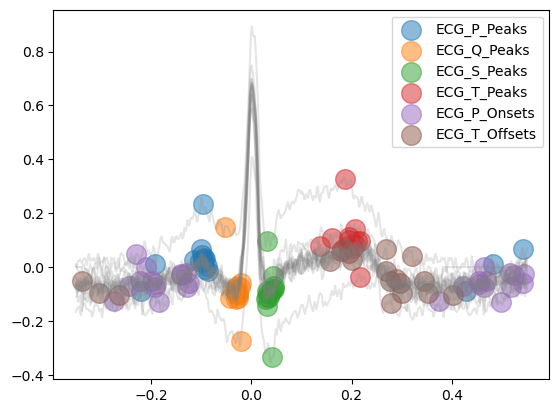

In [10]:
_, rpeaks = nk.ecg_peaks(lead_data['lead_1'], sampling_rate=sr)
_, waves_peak = nk.ecg_delineate(lead_data['lead_1'], 
                                 rpeaks, 
                                 sampling_rate=sr, 
                                 method="peak", 
                                 show=True, 
                                 show_type='all')

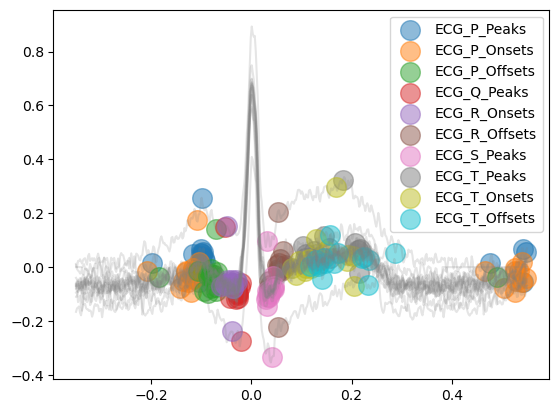

In [11]:
_, rpeaks = nk.ecg_peaks(lead_data['lead_1'], sampling_rate=sr)
_, waves_peak = nk.ecg_delineate(lead_data['lead_1'], 
                                 rpeaks, 
                                 sampling_rate=sr, 
                                 method="dwt", 
                                 show=True, 
                                 show_type='all')

# Lead II graphs

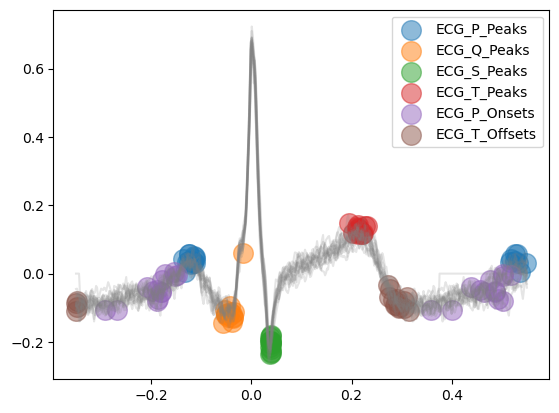

In [12]:
_, rpeaks = nk.ecg_peaks(lead_data['lead_2'], sampling_rate=sr)
_, waves_peak = nk.ecg_delineate(lead_data['lead_2'], 
                                 rpeaks, 
                                 sampling_rate=sr, 
                                 method="peak", 
                                 show=True, 
                                 show_type='all')

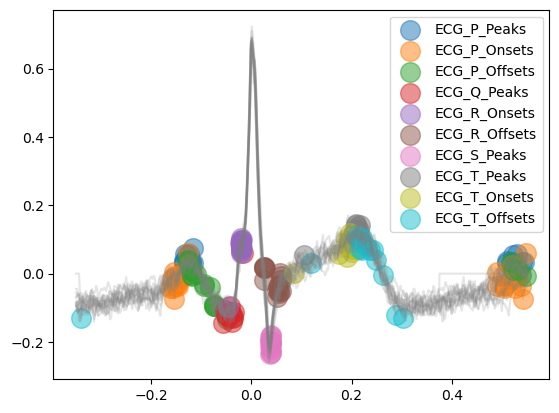

In [13]:
_, rpeaks = nk.ecg_peaks(lead_data['lead_2'], sampling_rate=sr)
_, waves_peak = nk.ecg_delineate(lead_data['lead_2'], 
                                 rpeaks, 
                                 sampling_rate=sr, 
                                 method="dwt", 
                                 show=True, 
                                 show_type='all')

# V1 graphs

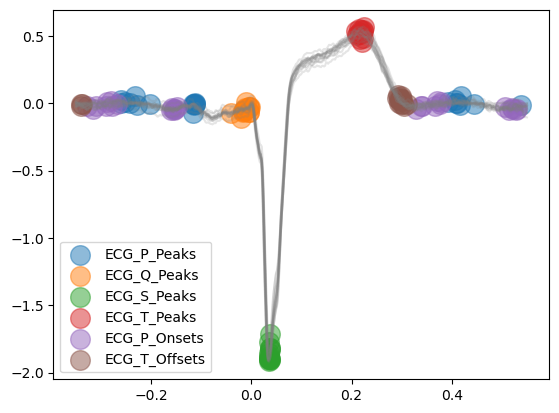

In [14]:
_, rpeaks = nk.ecg_peaks(lead_data['v1'], sampling_rate=sr)
_, waves_peak = nk.ecg_delineate(lead_data['v1'], 
                                 rpeaks, 
                                 sampling_rate=sr, 
                                 method="peak", 
                                 show=True, 
                                 show_type='all')

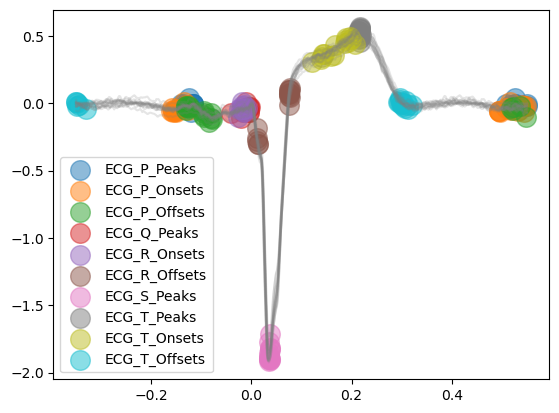

In [15]:
_, rpeaks = nk.ecg_peaks(lead_data['v1'], sampling_rate=sr)
_, waves_peak = nk.ecg_delineate(lead_data['v1'], 
                                 rpeaks, 
                                 sampling_rate=sr, 
                                 method="dwt", 
                                 show=True, 
                                 show_type='all')